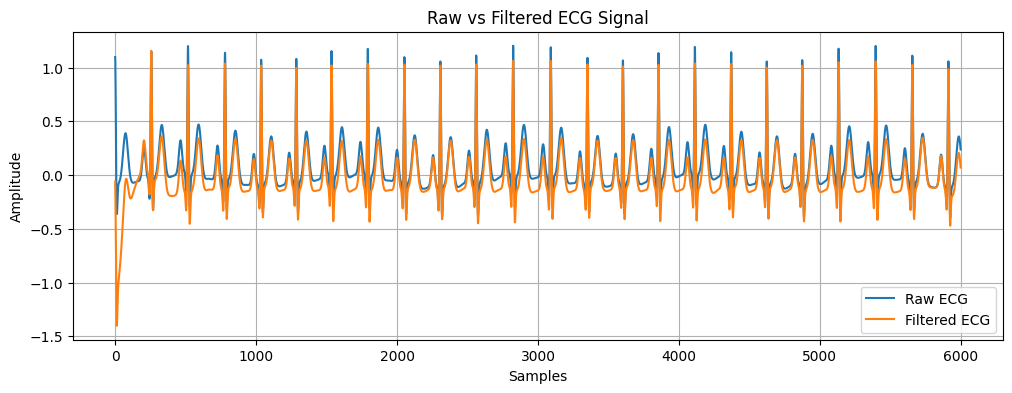

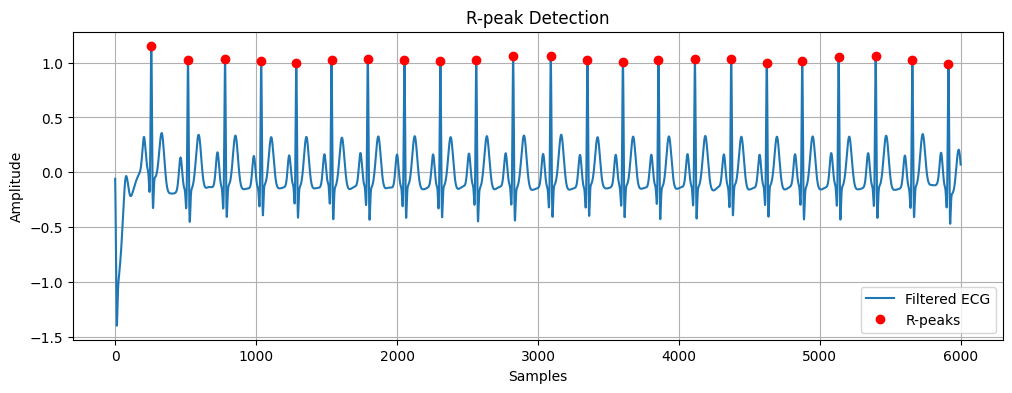

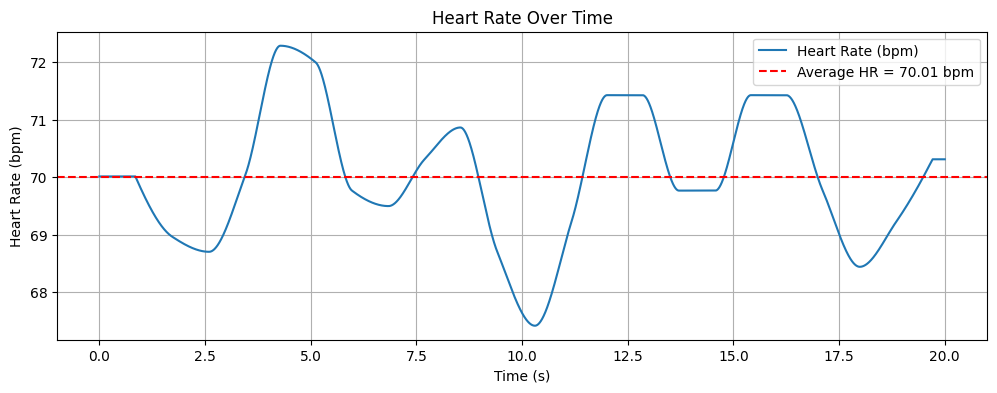

In [6]:
# --- Install required packages if not already installed ---
# !pip install wfdb biosppy neurokit2

# --- Import necessary libraries ---
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# --- Variant 4 parameters ---
duration = 20        # Duration of the ECG signal in seconds
fs = 300             # Sampling rate in Hz
lowcut = 0.7         # Low cutoff frequency for bandpass filter
highcut = 30         # High cutoff frequency for bandpass filter

# --- Simulate ECG signal ---
ecg = nk.ecg_simulate(duration=duration, sampling_rate=fs)

# --- Bandpass filter function ---
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# --- Apply bandpass filter to ECG signal ---
filtered_ecg = bandpass_filter(ecg, lowcut, highcut, fs)

# --- Plot raw and filtered ECG signals ---
plt.figure(figsize=(12, 4))
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("Raw vs Filtered ECG Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# --- Detect R-peaks using NeuroKit2 ---
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

# --- Plot R-peaks on the filtered signal ---
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# --- Compute and plot heart rate over time with average value ---
heart_rate = signals["ECG_Rate"]
time_hr = np.linspace(0, duration, len(heart_rate))
avg_hr = np.mean(heart_rate)

plt.figure(figsize=(12, 4))
plt.plot(time_hr, heart_rate, label="Heart Rate (bpm)")
plt.axhline(avg_hr, color='red', linestyle='--', label=f"Average HR = {avg_hr:.2f} bpm")
plt.title("Heart Rate Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Heart Rate (bpm)")
plt.legend()
plt.grid(True)
plt.show()
